# Title
The title of the notebook should be coherent with file name. Namely, file name should be:    
*author's initials_progressive number_title.ipynb*    
For example:    
*EF_01_Data Exploration.ipynb*

## Purpose
State the purpose of the notebook.

## Methodology
Quickly describe assumptions and processing steps.

## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- todo 1;
- todo 2;
- todo 3.

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [136]:
import os
from typing import List

# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

os.chdir('../')
from src.utils.data_describe import breve_descricao, serie_nulos, cardinalidade
os.chdir('./notebooks/')

# Options for pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plotly.offline.init_notebook_mode(connected=True)

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
    
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameter definition

We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.

In [129]:
RAW_FOLDER = '../data/raw/'
INTERIM_FOLDER = '../data/interim/'
PROCESSED_FOLDER = '../data/processed/'
REPORTS_FOLDER = '../reports/'
RANDOM_STATE = 42


# Data import
We retrieve all the required data for the analysis.

In [132]:
df = pd.read_parquet(INTERIM_FOLDER + 'df_train_interim_01_baseline.pqt')
df_evaluation = df.copy() 
print(f"df_evaluation's shape: {df_evaluation.shape}")

# Importing Kaggle's test dataset.
x_test_kaggle = pd.read_parquet(INTERIM_FOLDER + 'x_test_kaggle_prepared_baseline.pqt')
print(f"x_test_kaggle's shape: {x_test_kaggle.shape}")

df_evaluation's shape: (1460, 19)
x_test_kaggle's shape: (1459, 18)


## Splitting data in training and validation datasets

In [98]:
X = df_evaluation.drop(columns=['SalePrice'])
y = df_evaluation[['SalePrice']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# 1st experiment: Simple linear regression

This 1st experiment has the purpose to set a baseline to our model.

## Modeling and evaluating with the validation data

RMSE: 40198.72


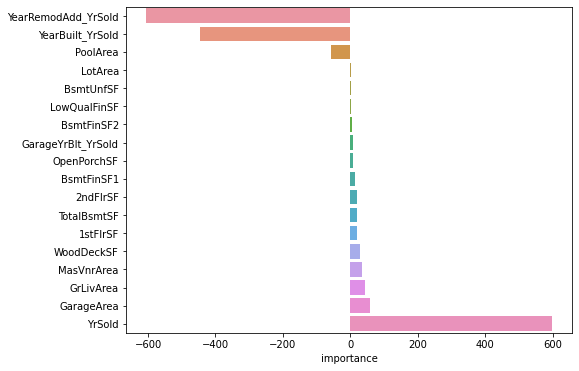

In [147]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coef_importance = pd.DataFrame(model.coef_[0], index=X_train.columns).sort_values(by=0, ascending=True)
coef_importance.rename(columns={0: 'importance'}, inplace=True)

a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(data=coef_importance, y=coef_importance.index, x='importance', ax=ax);

print(f"RMSE: {mse(y_test, y_pred)**.5:.2f}")

## Testing the Kaggle's test dataset

In [133]:
x_test_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LotArea              1459 non-null   int64  
 1   MasVnrArea           1459 non-null   float64
 2   BsmtFinSF1           1459 non-null   float64
 3   BsmtFinSF2           1459 non-null   float64
 4   BsmtUnfSF            1459 non-null   float64
 5   TotalBsmtSF          1459 non-null   float64
 6   1stFlrSF             1459 non-null   int64  
 7   2ndFlrSF             1459 non-null   int64  
 8   LowQualFinSF         1459 non-null   int64  
 9   GrLivArea            1459 non-null   int64  
 10  GarageArea           1459 non-null   float64
 11  WoodDeckSF           1459 non-null   int64  
 12  OpenPorchSF          1459 non-null   int64  
 13  PoolArea             1459 non-null   int64  
 14  YrSold               1459 non-null   int64  
 15  YearBuilt_YrSold     1459 non-null 

In [134]:
y_pred_kaggle = model.predict(x_test_kaggle)
y_pred_kaggle = pd.DataFrame(y_pred_kaggle, index=x_test_kaggle.index, columns=['SalePrice']).reset_index()
y_pred_kaggle.rename(columns={'index':'Id'}, inplace=True)
y_pred_kaggle

,Id,SalePrice
0,1461,130633.573822
1,1462,157762.583938
2,1463,208268.841270
3,1464,207237.118410
4,1465,174285.187616
5,1466,187003.001967
6,1467,192423.514880
7,1468,172639.243521
8,1469,187823.958322
9,1470,132860.689316


In [135]:
y_pred_kaggle.to_csv(PROCESSED_FOLDER + 'y_pred_kaggle_baseline_linear_regression.csv', index=False)

# 2nd experiment: Random forest regressor

This experiment has the purpose to compare the performance between a parametric method and a non-parametric model.

## Modeling and evaluating with the validation data

In [142]:
y_train.values.reshape(1,-1)

array([[145000, 178000,  85000, ..., 115000, 189950, 174000]], dtype=int64)

In [144]:
model = RandomForestRegressor()
model.fit(X_train, y_train.values)

y_pred = model.predict(X_test)

print(f"RMSE: {mse(y_test, y_pred)**.5:.2f}")

C:\Users\gusta\AppData\Local\Temp\ipykernel_24504\2870327245.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RMSE: 31026.77


## Testing the Kaggle's test dataset

In [145]:
y_pred_kaggle = model.predict(x_test_kaggle)
y_pred_kaggle = pd.DataFrame(y_pred_kaggle, index=x_test_kaggle.index, columns=['SalePrice']).reset_index()
y_pred_kaggle.rename(columns={'index':'Id'}, inplace=True)
y_pred_kaggle

,Id,SalePrice
0,1461,123926.660000
1,1462,157424.500000
2,1463,194889.650000
3,1464,187777.000000
4,1465,190662.790000
5,1466,187690.000000
6,1467,182903.220000
7,1468,178218.250000
8,1469,187174.860000
9,1470,125925.920000


In [146]:
y_pred_kaggle.to_csv(PROCESSED_FOLDER + 'y_pred_kaggle_baseline_random_forest_default.csv', index=False)

In [ ]:
coef_importance = pd.DataFrame(model.coef_[0], index=X_train.columns).sort_values(by=0, ascending=True)
coef_importance.rename(columns={0: 'importance'}, inplace=True)

a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(data=coef_importance, y=coef_importance.index, x='importance', ax=ax);